In [47]:
import keys
import datetime
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [27]:
client = Client(keys.APIKey, keys.SecretKey)

In [28]:
BTC = client.get_historical_klines(symbol=symbol, interval=client.KLINE_INTERVAL_30MINUTE, start_str="1 year ago UTC")

In [30]:
BTC = pd.DataFrame(BTC, columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume',
                                'Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Ignore'])


In [31]:
BTC['Open time'] = pd.to_datetime(BTC['Open time'], unit='ms') 

In [32]:
BTC.set_index('Open time', inplace = True)

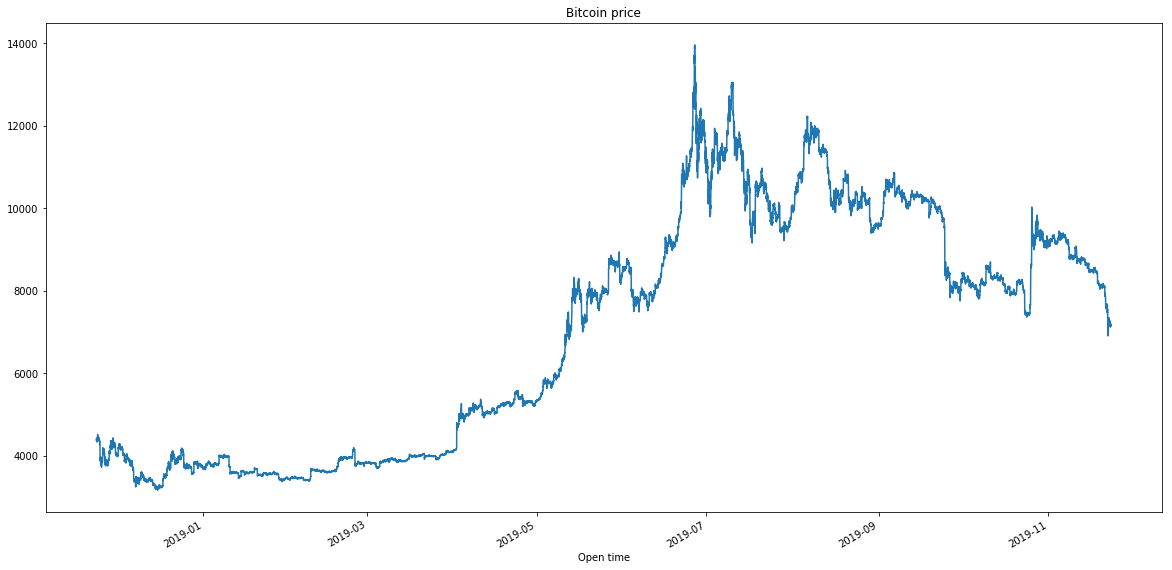

In [34]:
BTC['Close'] = BTC['Close'].astype(float)
BTC['Close'].plot(figsize=(20,10),title = 'Bitcoin price')

In [66]:
data = BTC.iloc[:,3:4].astype(float).values

array([[4375.21],
       [4407.47],
       [4396.6 ],
       ...,
       [7150.14],
       [7151.28],
       [7179.23]])

In [40]:
scaler = MinMaxScaler()

In [41]:
data = scaler.fit_transform(data)

In [44]:
training_set = data[:10000]
test_set = data[10000:]

In [46]:
X_train = training_set[0:len(training_set)-1]
Y_train = training_set[1:len(training_set)]

In [48]:
X_test = test_set[0:len(test_set)-1]
Y_test = X_test = test_set[1:len(test_set)]

In [49]:
X_train = np.reshape(X_train,(len(X_train),1,X_train.shape[1]))
X_test = np.reshape(X_test,(len(X_test),1,X_test.shape[1]))

In [52]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [56]:
model = Sequential()
model.add(LSTM(256, return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

In [60]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,Y_train,epochs=50,batch_size=16,shuffle=False)

Epoch 1/50
9999/9999 [==============================] - 17s 2ms/step - loss: 4.4797e-04
Epoch 2/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0014
Epoch 3/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0012
Epoch 4/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0014
Epoch 5/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0013
Epoch 6/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0019
Epoch 7/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0019
Epoch 8/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0012
Epoch 9/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0022
Epoch 10/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0016
Epoch 11/50
9999/9999 [==============================] - 15s 2ms/step - loss: 0.0019
Epoch 12/50
9999/9999 [==============================] - 15s 2ms/step 

In [62]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
real_price = scaler.inverse_transform(Y_test)

In [63]:
import matplotlib.pyplot as plt

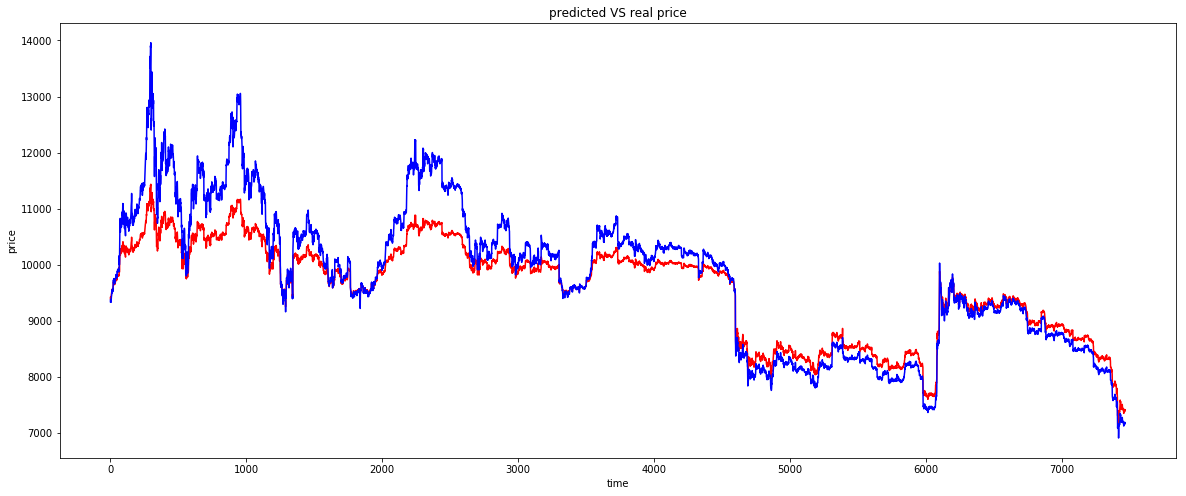

In [65]:
plt.figure(figsize=(20,8))
plt.plot(predicted_price,color='red',label='Predicted price of bitcoin')
plt.plot(real_price,color='blue',label='Real price of bitcoin')
plt.title('predicted VS real price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()
